# V.1 Exploring the green reds
### a) function that plot scatterplot matrix of red wine data

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

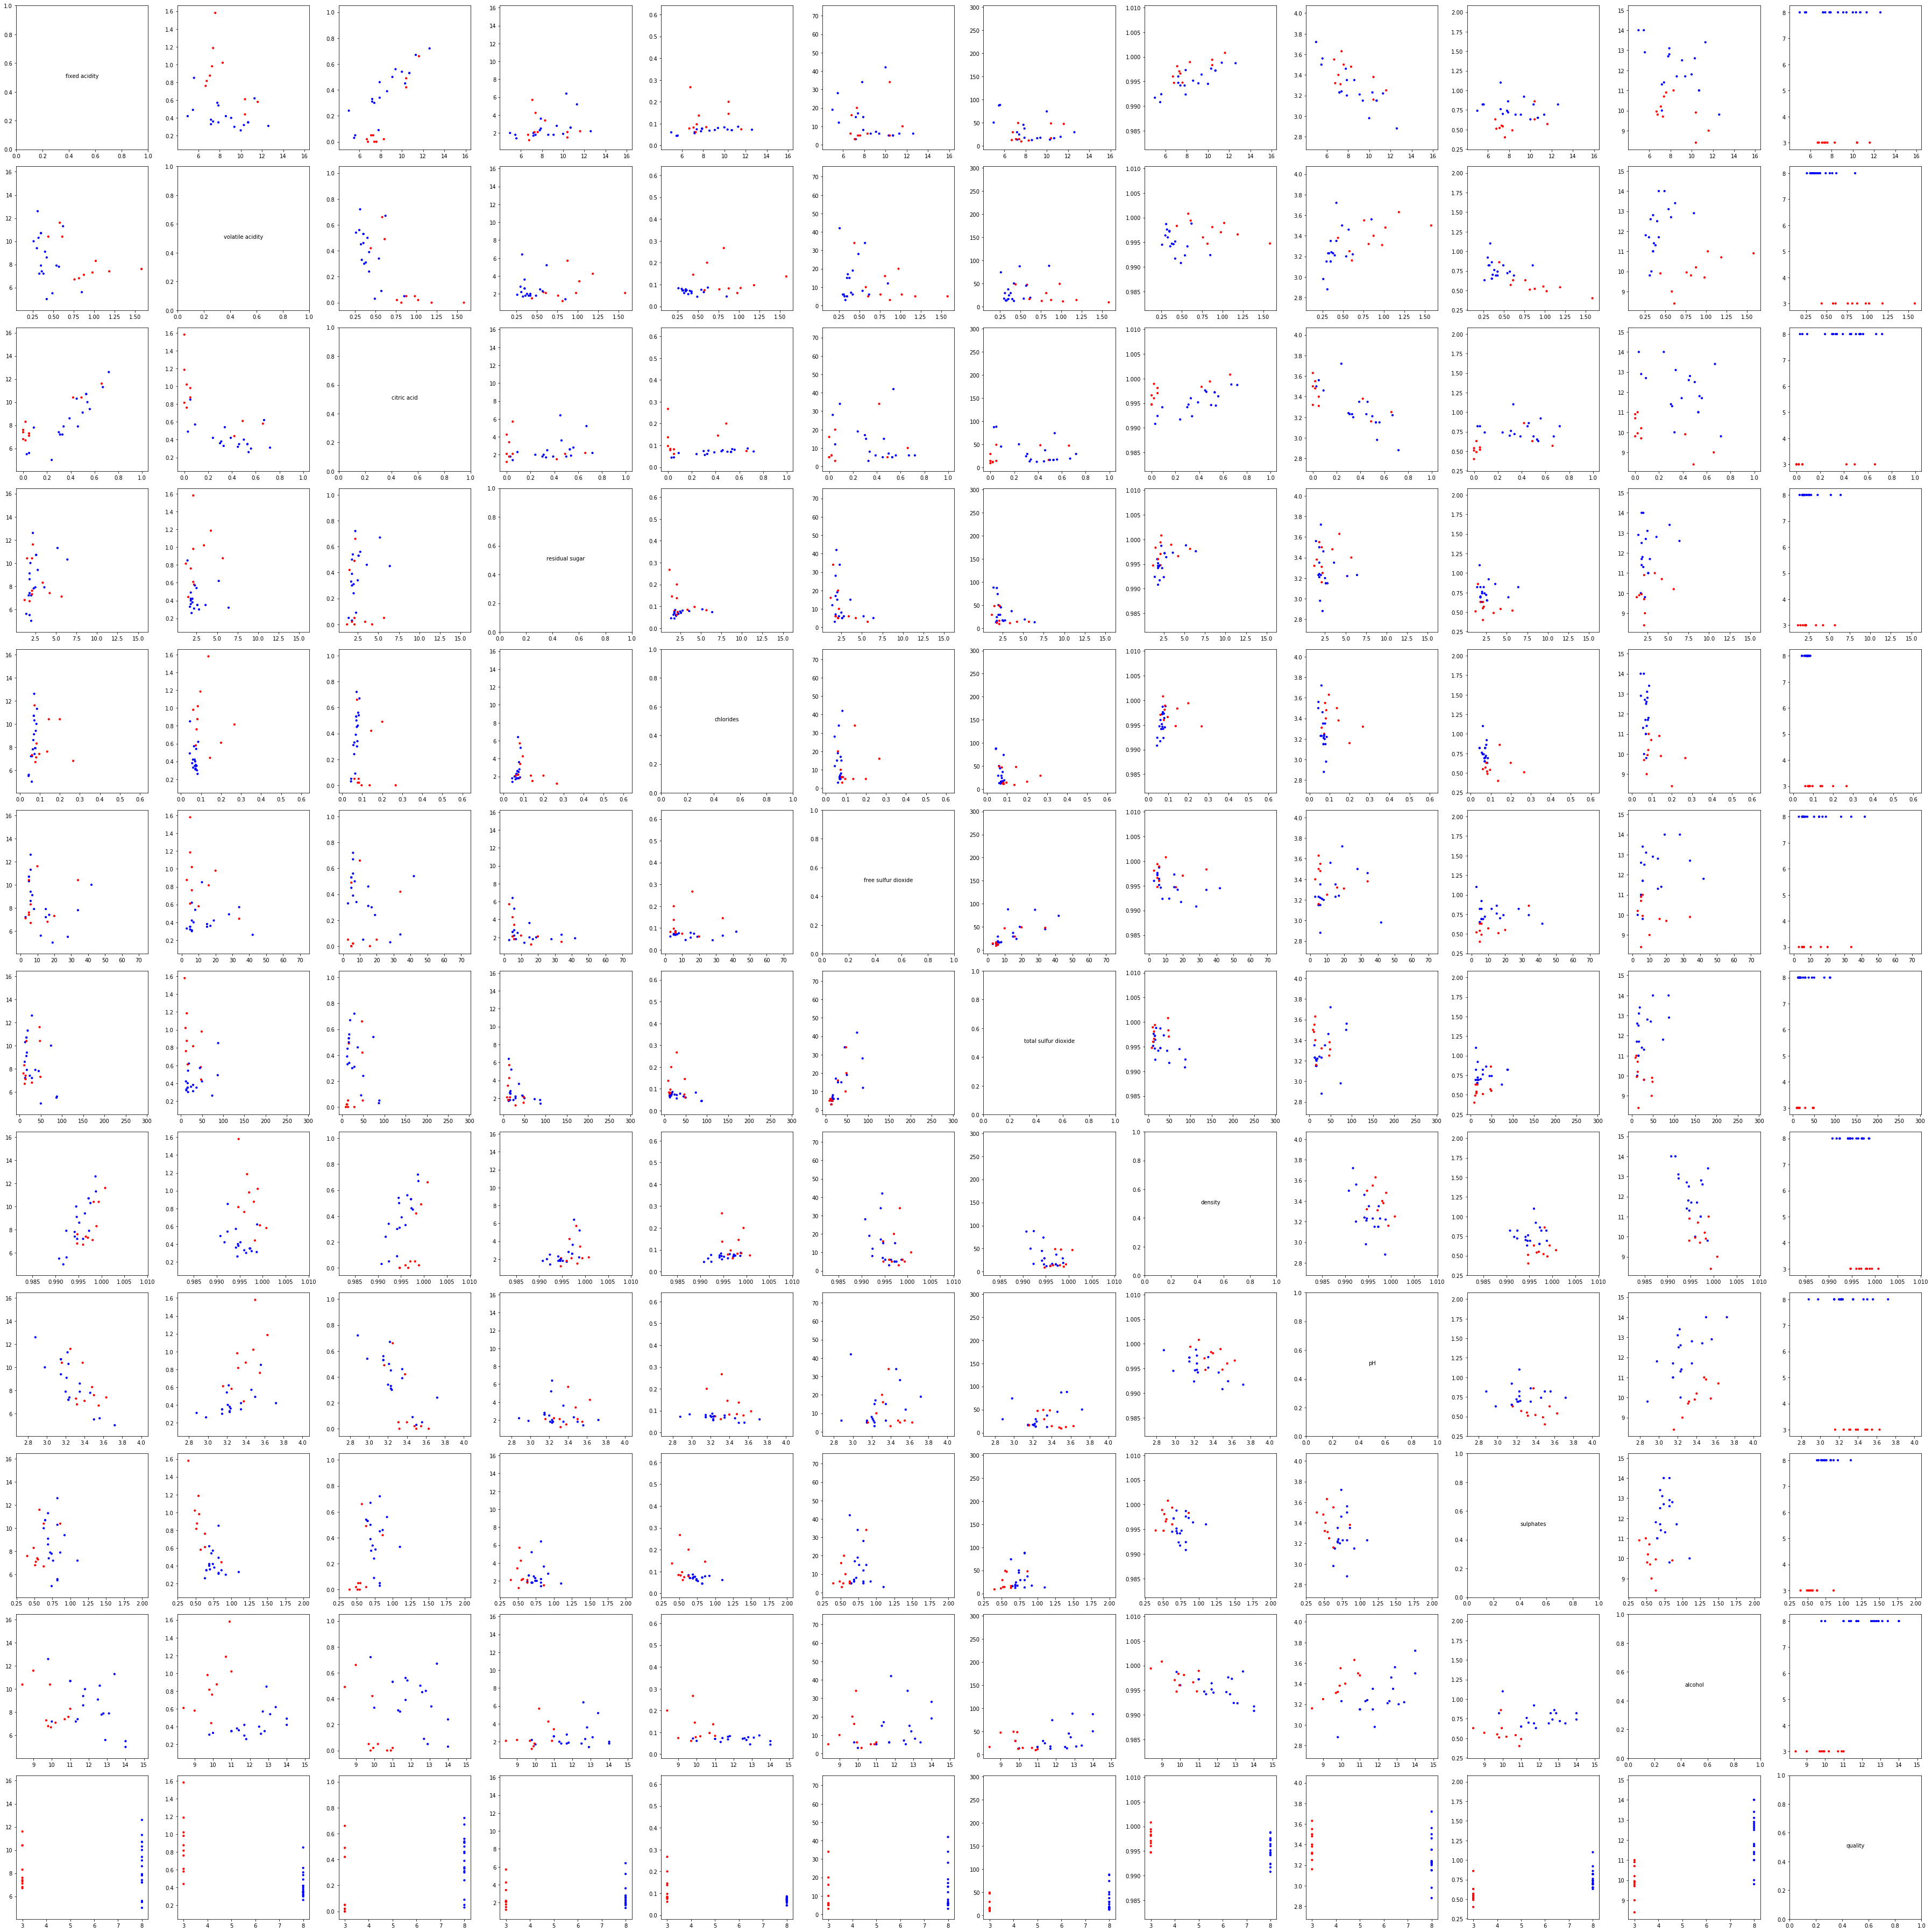

In [3]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot):
    df = pd.read_csv(wine_data, sep=';')
    numvars, numdata = df.shape
    fig, axes = plt.subplots(numdata, numdata, figsize=(50,50))
    for i in range(numdata):
        for j in range(numdata):
            if i == j:
                axes[i, j].text(0.5, 0.5, df.columns[i], ha='center')
            else:
                color = ['blue' if k >= good_threshold else 'red' for k in df['quality']]
                size = [10 if k >= good_threshold else 10 if k <= bad_threshold else 0 for k in df['quality']]
                axes[i,j].scatter(df[df.columns[i]], df[df.columns[j]], c = color, s = size)
    if save_plot==True:
        plt.savefig('./winedata.png')
    plt.tight_layout()
    fig

plot_scatter_matrix('winequality-red.csv', 8, 3, save_plot=False)

### b) the most useful factor for distinguishing high vs. low quality wine and why?
#### pH values and alcohol values seems the best factors to distinguish high and low quality wine because the scatter graph of the factors has distinguishable region of good wine and bad wine.


# V.2 Learning to perceptron
### a) & b) implement a perceptron

In [4]:
class perceptron():
    def __init__(self, thresholds=0.0, eta=0.01, n_iter=0):
        self.thresholds = thresholds
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = []
        result_ = []
        num_epoch = 0
        for i in range(1 + X.shape[1]):
            random.seed(0)
            self.w_.append(random.random())
        self.errors_ = []
        if (self.n_iter != 0):
            for _ in range(self.n_iter):
                errors = 0
                result = 0
                num_epoch += 1
                for xi, target in zip(X, y):
                    update = self.eta * (int(target) - self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += int(update != 0.0)
                    result = (num_epoch, errors, self.w_[1:], self.w_[0])
                self.errors_.append(errors)
                result_.append(result)
                
        else:
            while (1):
                errors = 0
                result = 0
                num_epoch += 1
                for xi, target in zip(X, y):
                    update = self.eta * (int(target) - self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += int(update != 0.0)
                    result = (num_epoch, errors, self.w_[1:], self.w_[0])
                self.errors_.append(errors)
                result_.append(result)
                if (errors == 0):
                    break
                
                
                #print(self.w_)
        
        return result_
    def net_input(self, X):
        activation = self.w_[0]
        for i in range(len(X)):
            activation += self.w_[i + 1] * X[i]
        return activation
    def predict(self, X):
        if self.net_input(X) > self.thresholds:
            return 1
        else:
            return -1
            
p = perceptron(eta=0.01, n_iter=0)


### c) function that will take the output of perceptron training function and generate two plots in one figure

In [5]:
def maxmin(X):
    xmaxVal = 0
    xminVal = X[0][0]
    ymaxVal = 0
    yminVal = X[0][1]
    for i in X:
        xmaxVal = max(xmaxVal, i[0])
        xminVal = min(xminVal, i[0])
        ymaxVal = max(ymaxVal, i[1])
        yminVal = min(yminVal, i[1])
    return xmaxVal + 1, xminVal - 1, ymaxVal + 1, yminVal - 1

def winequality(x, good_thresh, bad_thresh):
    good1 = []
    good2 = []
    bad1 = []
    bad2 = []
    goodwine = x[(x.quality >= good_thresh)].values
    badwine = x[(x.quality <= bad_thresh)].values
    for i in range(len(goodwine)):
        good1.append(goodwine[i][0])
        good2.append(goodwine[i][1])
    for i in range(len(badwine)):
        bad1.append(badwine[i][0])
        bad2.append(badwine[i][1])
    return good1, good2, bad1, bad2

[(1, 9, [-0.11957814847495182, 0.4996218515250482], 0.744421851525048), (2, 11, [-0.0995781484749518, 0.4260218515250483], 0.724421851525048), (3, 11, [-0.07957814847495179, 0.3524218515250484], 0.704421851525048), (4, 11, [-0.05957814847495177, 0.27882185152504846], 0.684421851525048), (5, 11, [-0.03957814847495175, 0.20522185152504846], 0.664421851525048), (6, 11, [-0.019578148474951707, 0.13162185152504846], 0.6444218515250479), (7, 11, [0.000421851525048339, 0.05802185152504846], 0.6244218515250479), (8, 13, [0.05442185152504839, -0.01597814847495152], 0.6044218515250479), (9, 11, [0.07442185152504843, -0.0895781484749515], 0.5844218515250479), (10, 11, [0.09442185152504848, -0.1631781484749515], 0.5644218515250479), (11, 11, [0.11442185152504852, -0.23677814847495154], 0.5444218515250479), (12, 11, [0.13442185152504854, -0.31037814847495143], 0.5244218515250478), (13, 11, [0.15442185152504856, -0.3839781484749513], 0.5044218515250478), (14, 11, [0.17442185152504858, -0.45757814847

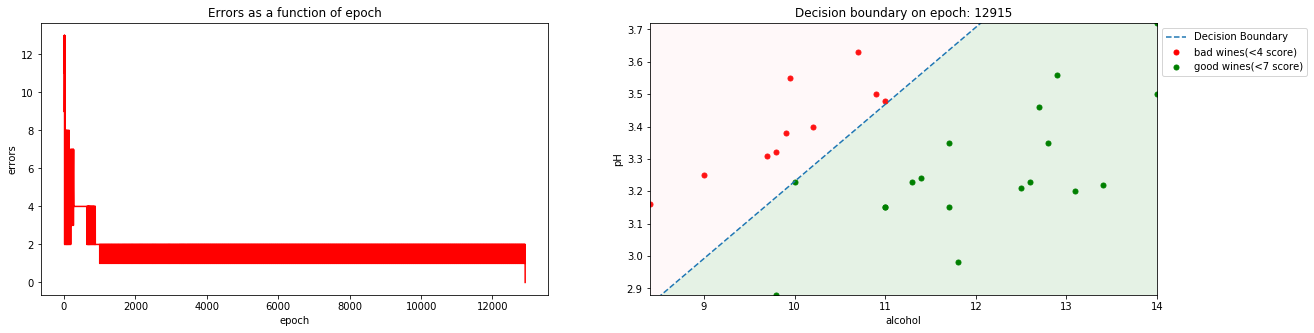

In [237]:
def plot_performance_per(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    y = ['1' if k >= good_thresh else '-1' for k in df_data['quality']]
    X = df_data[['alcohol', 'pH']].values
    data = p.fit(X, y)
    print(data)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x1_ = []
    y1_ = []
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    for i in data:
        x1 = i[0]
        y1 = i[1]
        x1_.append(x1)
        y1_.append(y1)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal) + 1)
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
                    y2_.append(y2)
    else:
        epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal) + 1)
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
            y2_.append(y2)
    
    plt.subplot(121)
    plt.plot(x1_, y1_, color='red')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Errors as a function of epoch")
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(<{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance_per.png')
plot_performance_per(p, 'winequality-red.csv', 8, 3,)

### d) modify the red wine data to help the perceptron learn more quickly

In [209]:
def average(values):
    if len(values) == 0:
        return None
    return sum(values, 0.0) / len(values)

def std(values):
    if len(values) < 2:
        return None
    sd = 0.0
    summ = 0.0
    meanvalue = average(values)
    for i in range(0, len(values)):
        diff = values.values[i] - meanvalue
        summ += diff * diff
    sd = summ / (len(values))
    return sd ** (1/2)
                
def standardization(data):
    x0 = data[data.columns[0]]
    x0mean = average(x0)
    x0std = std(x0)
    for i in data[data.columns[0]]:
        i = (x0 - x0mean) / x0std
        
    x1 = data[data.columns[1]]
    x1mean = average(x1)
    x1std = std(x1)
    for j in data[data.columns[1]]:
        j = (x1 - x1mean) / x1std

    #for k in data:
    stdata = data.loc[:, (data.columns[0], data.columns[1], data.columns[2])].copy()
    stdata.loc[:, (data.columns[0])] = i
    stdata.loc[:, (data.columns[1])] = j
    return stdata

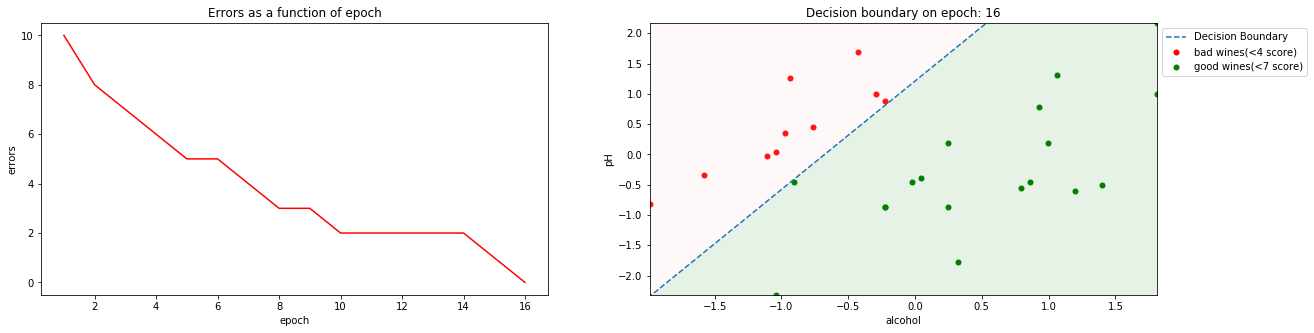

In [210]:
def plot_performance_per_std(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    rescaled = standardization(df_data)
    good1, good2, bad1, bad2 = winequality(rescaled, good_thresh, bad_thresh)
    y = ['1' if k >= good_thresh else '-1' for k in df_data['quality']]
    X = rescaled[['alcohol', 'pH']].values
    data = p.fit(X, y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x1_ = []
    y1_ = []
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    for i in data:
        x1 = i[0]
        y1 = i[1]
        x1_.append(x1)
        y1_.append(y1)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal) + 1)
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
                    y2_.append(y2)
    else:
        epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal) + 1)
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
            y2_.append(y2)
    plt.subplot(121)
    plt.plot(x1_, y1_, color='red')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Errors as a function of epoch")
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(<{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance_per_std.png')
plot_performance_per_std(p, 'winequality-red.csv', 8, 3,)

# V.3 My fair ADALINE
### a) Marvin notices and chides you for torturing your perceptron. Why?
#### The perceptron will never stop if the good wines and bad wines are not able to clearly divided into two regions. It will run until it finds no errors even if it is impossible to get 0 of errors.

### b) & c) implement an ADALINE

In [488]:
class adaline():
    def __init__(self, thresholds=0.0, eta=0.01, n_iter=0, batch=True):
        self.thresholds = thresholds
        self.eta = eta
        self.n_iter = n_iter
        self.batch = batch
    def fit(self, X, y):
        self.w_ = []
        result_ = []
        num_epoch = 0
        for i in range(1 + X.shape[1]):
            random.seed(0)
            self.w_.append(random.random())
        self.error_ = []
        cost = 0
        tmp = 0
        #batch learning
        if self.batch == True:
            if (self.n_iter != 0):
                for _ in range(self.n_iter):
                    num_epoch += 1
                    output = self.net_input(X)
                    error = y - output
                    self.w_[0] += self.eta * sum(error)
                    dotprod = self.productmatrix(self.tpmatrix(X),error)
                    self.w_[1:] = self.wupdate(dotprod)
                    cost = 1./2 * sum((error**2))
                    result = (num_epoch, cost, self.w_[1:], self.w_[0])
                    self.error_.append(cost)
                    result_.append(result)
                
            else:
                while (1):
                    num_epoch += 1
                    output = self.net_input(X)
                    error = y - output
                    self.w_[0] += self.eta * sum(error)
                    dotprod = self.productmatrix(self.tpmatrix(X),error)
                    self.w_[1:] = self.wupdate(dotprod)
                    cost = 1./2 * sum((error**2))
                    if round(tmp, 5) == round(cost, 5):
                        break
                    else:
                        tmp = cost
                    result = (num_epoch, cost, self.w_[1:], self.w_[0])
                    self.error_.append(cost)
                    result_.append(result)
        
        #online learning
        elif self.batch == False:
            if (self.n_iter != 0):
                for _ in range(self.n_iter):
                    num_epoch += 1
                    for xi, target in zip(X, y):
                        output = self.net_input2(xi)
                        error = target - output
                        self.w_[0] += self.eta * error
                        dotprod = self.productmatrix2(xi, error)
                        for i in dotprod:
                            self.w_[1:] += self.eta * i
                    cost = ((y - self.net_input(X))**2).sum() / 2.0
                    result = (num_epoch, cost, self.w_[1:], self.w_[0])
                    self.error_.append(cost)
                    result_.append(result)
                
            else:
                while (1):
                    num_epoch += 1
                    for xi, target in zip(X, y):
                        output = self.net_input2(xi)
                        error = target - output
                        self.w_[0] += self.eta * error
                        dotprod = self.productmatrix2(xi, error)
                        self.w_[1:] = self.wupdate(dotprod)
                    cost = ((y - self.net_input(X))**2).sum() / 2.0
                    if round(tmp, 5) == round(cost, 5):
                        break
                    else:
                        tmp = cost
                    result = (num_epoch, cost, self.w_[1:], self.w_[0])
                    self.error_.append(cost)
                    result_.append(result)
        return result_

    def tpmatrix(self, X):
        j = 0
        
        result = [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]
        #t = [[0] * (len(X))] * len(X[0])
        #for i in range(len(X)):
        #    for j in range(len(X[0])):
        return result

    def net_input(self, X):
        dot = self.productmatrix(X, self.w_[1:])
        r_ = []
        for i in range(len(dot)):
            r = dot[i] + self.w_[0]
            r_.append(r)
        return r_
    
    def net_input2(self, X):
        activation = self.w_[0]
        for i in range(len(X)):
            activation += self.w_[i + 1] * X[i]
        return activation
    
    def productmatrix(self, X, w):
        dot = 0
        result = 0
        an = []

        for i in range(len(X)):
            result = 0
            for j in range(len(w)):
                dot = X[i][j] * w[j]
                result += dot
            an.append(result)
        return an

    def productmatrix2(self, X, w):
        dot = 0
        result = 0
        an = []

        for i in range(len(X)):
            result = 0
            dot = X[i] * w
            result += dot
            an.append(result)
        return an
    def wupdate(self, dotprod):
        for i in range(len(self.w_[1:])):
            
            self.w_[i + 1] += self.eta * dotprod[i]
        return (self.w_[1:])


#a = adaline(eta=0.00001, n_iter=0)

In [489]:
def productmatrix(self, X, w):
    dot = 0
    result = 0
    an = []

    for i in range(len(X)):
        result = 0
        for j in range(len(w)):
            dot = X[i][j] * w[j]
            result += dot
        an.append(result)
    return an
def tpmatrix(X):
        j = 0
        
        #result = [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]
        t = [[0] * (len(X))] * len(X[0])
        
        for i in range(len(X)):
            for j in range(len(X[0])):
                t[i][j] = X[j][i]
        return t

range(7, 15)
[3.3481739428699813, 3.5781820766709913, 3.808190210472001, 4.0381983442730105, 4.2682064780740205, 4.49821461187503, 4.72822274567604, 4.95823087947705]


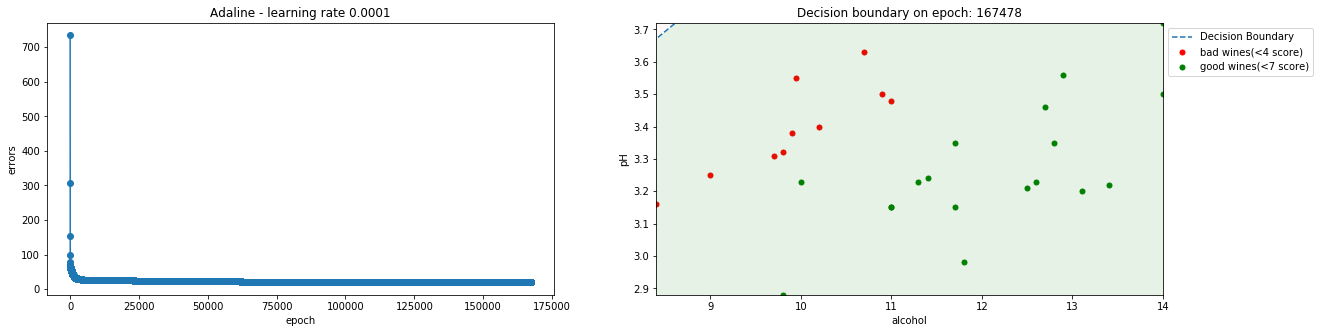

In [495]:
def plot_performance_ada(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    y = df_data['quality'].values
    X = df_data[['alcohol', 'pH']].values
    data = ada.fit(X, y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x1_ = []
    y1_ = []
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    for i in data:
        x1 = i[0]
        y1 = i[1]
        x1_.append(x1)
        y1_.append(y1)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal))
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = ((-i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
                    y2_.append(y2)
    else:
        epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = ((-i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
            y2_.append(y2)

    plt.subplot(121)
    plt.plot(range(1, len(ada.error_) + 1), ada.error_, marker='o')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Adaline - learning rate {}".format(ada.eta))
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(<{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance_ada.png')

        
ada = adaline(eta=0.0001)
plot_performance_ada(ada, 'winequality-red.csv', 8, 3,)